<a href="https://colab.research.google.com/github/anabomfim84/CienciaDeDados/blob/main/MVP_Airbnb_RioDeJaneiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP de Análise de Dados e Boas Práticas**

**Aluna: Ana Cristina Paula Bomfim**

**MVP Airbnb Rio de Janeiro**

# 1.Definição do Problema
O Airbnb é uma plataforma de reservas que conecta pessoas que querem alugar suas propriedades com pessoas que querem se hospedar nas mesmas em qualquer lugar do mundo.
Os dados foram coletados através do portal https://insideairbnb.com/get-the-data/ e o arquivo utilizado foi o de nome **listings.csv** que refere-se a informações do estado Rio do Janeiro com última atualização em Junho/24.

**Qual é a descrição do problema?** Identificar os comportamentos médios e discrepantes dos preços das acomodações e identificar tendências por bairros.

**Problema de aprendizado supervisionado ou não supervisionado?** Não supervisionado.

**Premissas ou hipóteses você tem sobre o problema?** Qual o tipo de imóvel mais alugado no Airbnb.
Qual os bairros com as diárias mais caras.

**Restrições ou condições foram impostas para selecionar os dados?** Os dados do dataset Jun de 2024.

**Informações sobre os atributos:**

*   **id:** Id gerado para identificar o imóvel.
*   **name:** Nome da propriedade anunciada.
*   **host_id:** Id do proprietário (Anfitrião) da propriedade.
*   **host_name:** Nome do anfitrião.
*   **neighbourhood_group:** Esta coluna não contém valor válido.
*   **neighbourhood:** Bairro.
*   **latitude:** Coordenada da latitude da propriedade.
*   **longitude:** Coordenada da longitude da propriedade.
*   **room_type:** Tipo de quarto oferecido.
*   **price:** Preço para alugar o imóvel.
*   **minimum_nights:** Quantidade mínima de noites para reservar.
*   **number_of_reviews:** Número de reviews que a propriedade possui.
*   **last_review:** Data do último review.
*   **reviews_per_month:** Quantidade de reviews por mês.
*   **calculated_host_listings_count:** Quantidade de imóveis do mesmo anfitrião.
*   **availability_365;** Número de dias de disponibilidade dentro de 365 dias.
*   **number_of_reviews_ltm;** O número de avaliações que a propriedade tem (nos últimos 12 meses).
*   **Licence;** Esta coluna não contém valor válido.











In [2]:
# Import
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns



In [3]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# 2.Carga de Dados

In [33]:
# Carrega um arquivo csv usando uma URL
csv = pd.read_csv ( "https://raw.githubusercontent.com/anabomfim84/MVPAirbnbRJ/refs/heads/main/listings.csv")

# Informa o cabeçalho das colunas
colunas = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license']

csv.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23,NaN
1,220377,Suíte Casal (banheiro privativo),1142424,Taciana,NaN,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23,NaN
3,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36,NaN
4,223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,NaN,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17,NaN


# 3.Análise dos Dados

**Atributos e Instâncias**

In [5]:
# Mostra as dimensões do dataset
print(csv.shape)

(34664, 18)


O dataset possui e 34664 **instâncias** (linhas) e 18 **atributos** (colunas).

**Tipos de Dados dos Atributos**

In [6]:
# Verifica o tipo de dados de cada atributo
csv.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


**Primeiras Linhas do Dataset**

In [7]:
# Verfica as primeiras linhas do dataset
csv.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,2024-06-08,1.88,1,274,23,NaN
1,220377,Suíte Casal (banheiro privativo),1142424,Taciana,NaN,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,2024-03-28,0.03,3,283,1,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,2024-06-02,1.70,1,241,23,NaN
3,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2024-06-25,2.85,1,93,36,NaN
4,223073,Modern Loft 1 • Ipanema Posto 9 • 500 mb,503995,❤️ BrUx ❤️,NaN,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,2024-06-02,3.04,7,348,17,NaN


Ao analisar as primeiras linhas, é possível perceber que a coluna neighbourhood_group e license possuem valores vazios. E que as colunas id, name, host_name e last_review possuem conteúdos que não são necessários nesta análise.


**Valores Faltantes, Discrepantes e Inconsistentes**

In [8]:
# Colunas com valores nulos
print(csv.isnull().sum())


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               34664
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                               972
minimum_nights                        0
number_of_reviews                     0
last_review                        8446
reviews_per_month                  8446
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           34664
dtype: int64


 Verificando os últimos resultados, é possível perceber que temos 5 colunas com valores vazios. A coluna **neighbourhood_group** e **license** possuem 100% dos seus valores vazios.
Iremos excluir as colunas com valores vazios e as colunas desnecessárias para as análises.

In [9]:
# Exclue colunas com valores 100% nulo
csv = csv.drop(columns=['license', 'neighbourhood_group'])

# Exclue colunas desnecessárias para a análise
csv = csv.drop(columns=['id', 'name', 'host_name', 'last_review'])


In [10]:
# Verificando valores nulos

print(csv.isnull().sum())

host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              972
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8446
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


As colunas price e reviews_per_month possuem grande quantidade de valores nulos. Iremos susbstituir os valores nulos por 0.

In [11]:
#Substituindo valores Nulos por 0
csv.reviews_per_month.fillna(0, inplace=True)
csv.price.fillna(0, inplace=True)

print(csv.isnull().sum())

host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


In [12]:
# Verficando novamente as primeiras linhas do dataset
csv.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,68997,Copacabana,-22.96599,-43.17940,Entire home/apt,310.0,5,319,1.88,1,274,23
1,1142424,Tijuca,-22.92880,-43.24046,Private room,220.0,1,5,0.03,3,283,1
2,102840,Copacabana,-22.97735,-43.19105,Entire home/apt,203.0,2,291,1.70,1,241,23
3,153691,Copacabana,-22.98107,-43.19136,Entire home/apt,201.0,3,476,2.85,1,93,36
4,503995,Ipanema,-22.98280,-43.20467,Entire home/apt,321.0,1,471,3.04,7,348,17


Ao exibir novamente as cinco primeiras linhas do dataset, verifica-se que as colunas foram excluídas com sucesso.

In [13]:
# Resumo estatístico do dataset
csv.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.466400e+04,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000,34664.000000
mean,1.979962e+08,-22.967415,-43.248751,710.685264,3.683360,22.303658,0.821712,9.070909,203.164695,7.660282
std,1.898936e+08,0.034793,0.099478,5588.530452,14.203589,44.086305,1.139377,24.042257,116.524265,12.011221
min,3.607000e+03,-23.073276,-43.723009,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.714992e+07,-22.984610,-43.303282,190.000000,1.000000,1.000000,0.020000,1.000000,90.000000,0.000000
50%,1.130967e+08,-22.972840,-43.194384,300.000000,2.000000,5.000000,0.360000,2.000000,190.000000,2.000000
75%,3.710267e+08,-22.956465,-43.185429,554.000000,3.000000,24.000000,1.160000,5.000000,320.000000,10.000000
max,5.856746e+08,-22.749950,-43.104400,633125.000000,1000.000000,674.000000,16.960000,200.000000,365.000000,132.000000


***Resumo Estatístico***


Acima foi exibido resumo estatístico das variáveis numéricas do dataset, e nele pode-se perceber as seguintes observações:

**Coluna Price**

- 300 é o valor médio dos aluguéis e o preço máximo 633.125.
- 75% dos valores do aluguéis é abaixo de 554.

**Coluna minimum_nights**

- Mínimo de 1 noite e máximo de 1000 noites, ou seja mais de um ano(365 noites).
- Média 2 noites.

**Coluna calculated_host_listings_count**

- Existem proprietários com 200 acomodações.

## 3.1 Distribuição das Variáveis e Pré Processamento de Dados.


**Histograma:** Para identificar a distribuição das variáveis quantitativas.

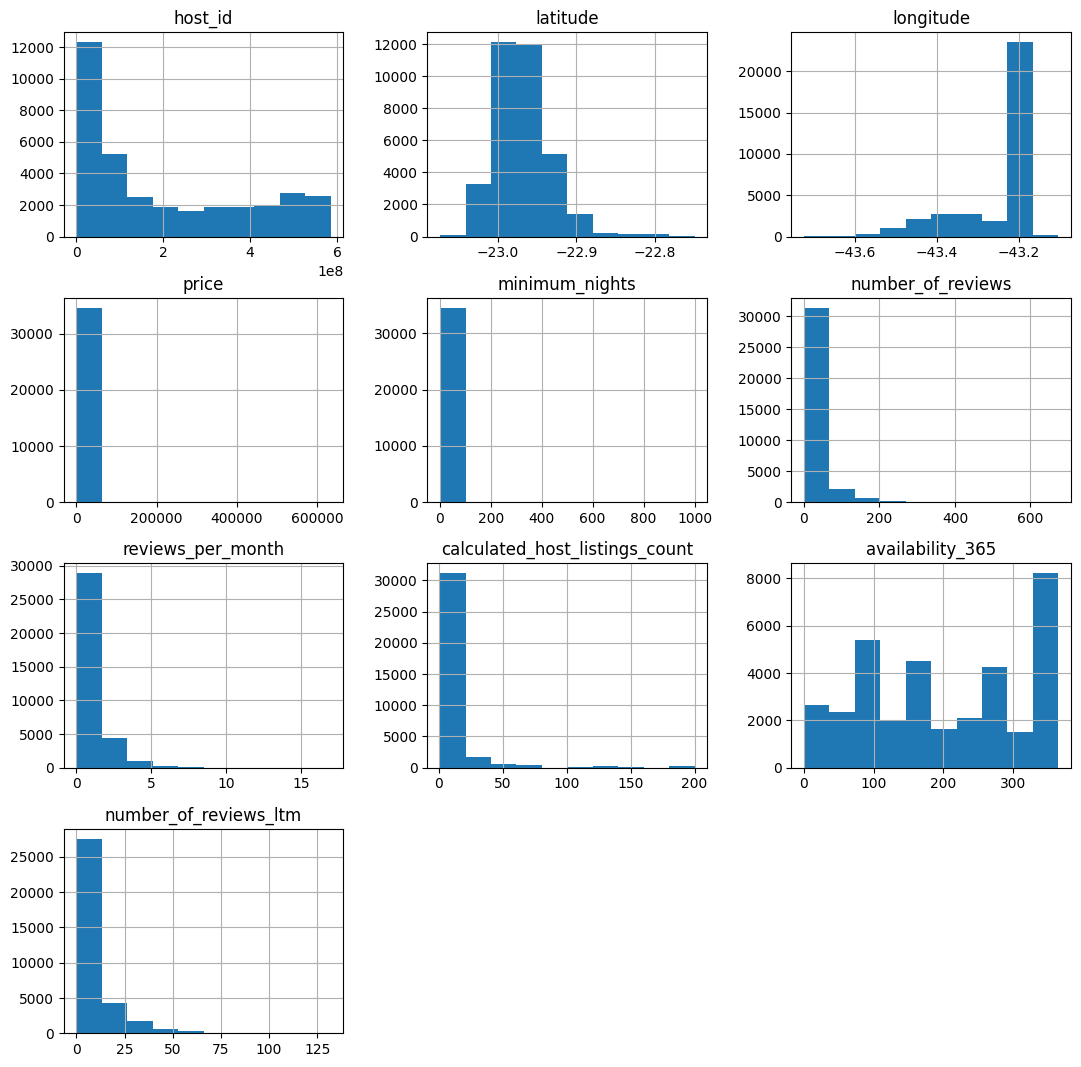

In [14]:
# Histograma
csv.hist(figsize = (13,13))
plt.show()

Pela distribuição do histograma é possível verificar a presença de outliers. As variáveis **price**, **minimum_nights** e **calculated_host_listings_count** não seguem uma distribuição e distorcem a representação gráfica.

**Boxplot:** O boxplot ajuda a ter uma ideia da dispersão dos dataset e confirmar os possíveis outliers.

Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.



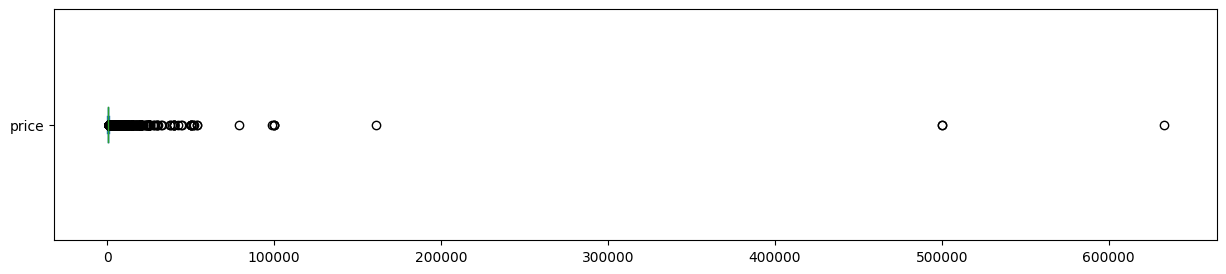

Existem 3854 alocações com preços maiores que 1000.
Existem 25999 alocações com preços menores ou igual a 554.


In [15]:
# BoxPlot Price
csv.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Preços acima de 1000 e menores que 554.
maximo_preco = len(csv.query('price > 1000'))
print(f"Existem {maximo_preco} alocações com preços maiores que 1000.")
minimo_preco = len(csv.query('price <= 554'))
print(f"Existem {minimo_preco} alocações com preços menores ou igual a 554.")





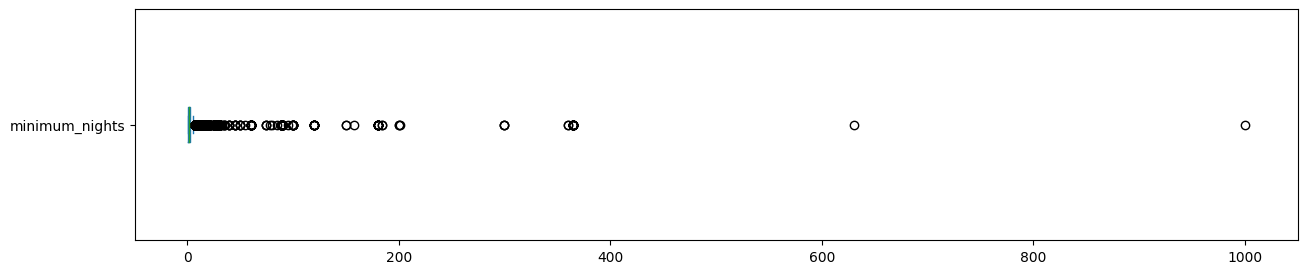

Existem 34466 alocações com quantidade mínima de noites para reservar de 1 mês ou menos.
Existem 34 alocações com 200 dias ou mais para reservar.


In [16]:
# Boxplot minimum_nights
csv.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Mínimo de Noites acima de 30 dias
min_noites = len(csv.query('minimum_nights <= 30'))
print(f"Existem {min_noites} alocações com quantidade mínima de noites para reservar de 1 mês ou menos.")
max_noites = len(csv.query('minimum_nights >= 200'))
print(f"Existem {max_noites} alocações com 200 dias ou mais para reservar.")

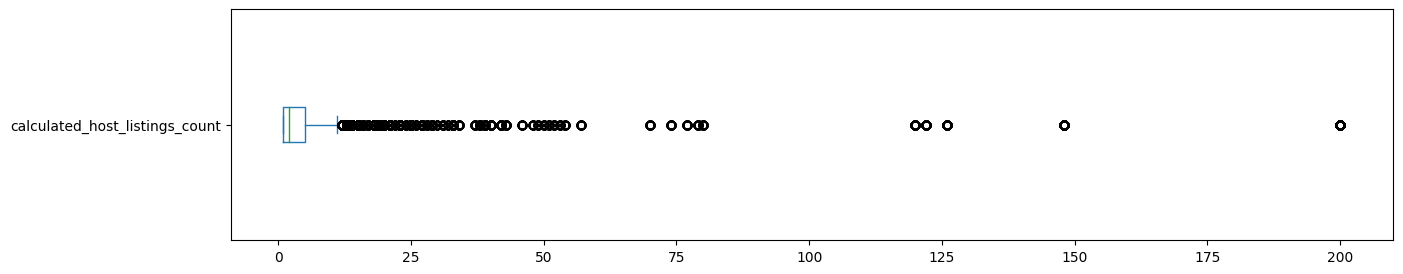

Acima de 50 Imóveis por Anfitrião
1363 entradas
3.9320%


In [17]:
# Boxplot calculated_host_listings_count
csv.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# Imóveis por anfitrião acima de 50
print("Acima de 50 Imóveis por Anfitrião")
print("{} entradas".format(len(csv[csv.calculated_host_listings_count > 50])))
print("{:.4f}%".format((len(csv[csv.calculated_host_listings_count > 50]) / csv.shape[0])*100))

**Identificamos outliers nas variáveis price, minimum_nights e calculated_host_listings_count.
Iremos remover os outliers, construir um novo dataset e plotar um novo histograma.**

In [18]:
# Remover Outliers e construir um novo Dataset
new_csv = csv.copy()
new_csv .drop(new_csv [new_csv .price > 1000].index, axis=0, inplace=True)
new_csv .drop(new_csv [new_csv .minimum_nights > 30].index, axis=0, inplace=True)
new_csv .drop(new_csv [new_csv .calculated_host_listings_count > 50].index, axis=0, inplace=True)

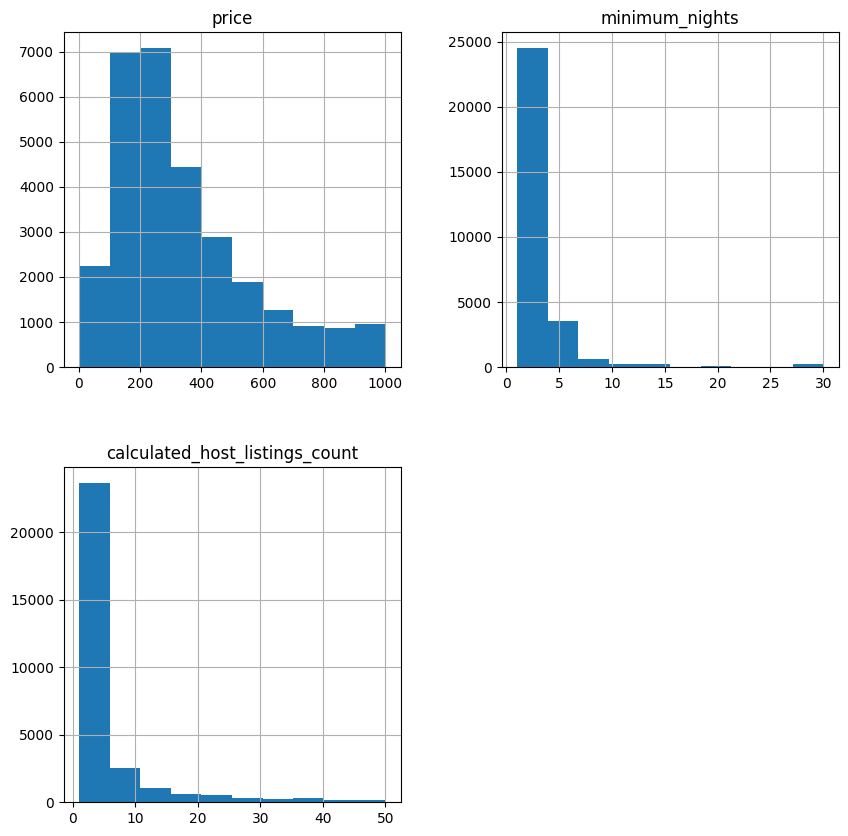

In [19]:
# Histograma para as variáveis analisadas
new_csv[["price", "minimum_nights", "calculated_host_listings_count"]].hist(figsize=(10,10));

 Após a limpeza dos dados é possível iniciar as análises e responder as premissas do problema.

## 3.2 Análises

Nesta etapa iremos utilizar as técnicas de modelagem em Data Science. Construiremos possíveis modelos com a análise exploratória dos dados (tabelas e gráficos).

***Bairros com diárias mais caras.***

In [20]:
new_csv.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Praia da Bandeira,600.000000
Complexo do Alemão,490.000000
Leblon,482.565181
São Conrado,482.451777
Grumari,464.800000
Joá,462.083333
Lagoa,460.410526
Santíssimo,450.800000
Ipanema,434.870072


Bairros como Praia da Bandeira, Complexo do Alemão e Santíssimo estão com média de preço superior a Leblon e São Conrado, que são locais com valores mais elevados.
Vamos realizar uma análise mais detalhada para verificar esse resultado.

In [21]:
# Quantidade de imóveis em Praia da  Bandeira
new_csv[new_csv.neighbourhood == "Praia da Bandeira"]

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6994,189600653,Praia da Bandeira,-22.81325,-43.17910,Entire home/apt,200.0,10,0,0.0,1,365,0
7210,208106359,Praia da Bandeira,-22.81124,-43.17749,Private room,1000.0,1,0,0.0,1,179,0


In [22]:
# Quantidade de imóveis em Complexo do Alemão
new_csv[new_csv.neighbourhood == "Complexo do Alemão"]

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6354,155642978,Complexo do Alemão,-22.859980,-43.274760,Shared room,900.0,1,1,0.01,1,365,0
28329,538121179,Complexo do Alemão,-22.866171,-43.269015,Private room,80.0,3,4,0.88,1,365,4


In [23]:
# Quantidade de imóveis em Praia da  Bandeira
new_csv[new_csv.neighbourhood == "Santíssimo"]

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3498,60407393,Santíssimo,-22.871520,-43.519260,Entire home/apt,600.0,1,0,0.00,1,365,0
14248,427748829,Santíssimo,-22.872910,-43.523500,Entire home/apt,949.0,1,0,0.00,1,365,0
20275,499992733,Santíssimo,-22.865328,-43.515281,Entire home/apt,500.0,1,0,0.00,1,365,0
26361,517457625,Santíssimo,-22.864241,-43.523873,Private room,105.0,1,24,3.67,1,81,24
27901,552660789,Santíssimo,-22.872417,-43.530640,Shared room,100.0,1,0,0.00,1,269,0


Analisando os três bairros podemos perceber uma discrepância no valor das diárias.
O bairro Praia da Bandeira(Praça da Bandeira) possue apenas duas entradas, uma de 200 e outra de 1000.

O bairro Complexo do Alemão também possue apenas duas entradas, uma de 80 e outra de 900. Apesar de 900 ser um quarto compartilhado, o valor fica fora da realidade do local.

O bairro Santíssimo possuem 5 entradas, 3 com valores igual ou acima de 500, o que não condiz com o local.

Iremos deletar esses bairros da análise.

In [24]:
#Deletando os bairros Praia da Bandeira e Complexo do Alemão do dataset

new_csv.drop(new_csv[new_csv.neighbourhood == "Praia da Bandeira"].index, axis=0, inplace=True)
new_csv.drop(new_csv[new_csv.neighbourhood == "Complexo do Alemão"].index, axis=0, inplace=True)
new_csv.drop(new_csv[new_csv.neighbourhood == "Santíssimo"].index, axis=0, inplace=True)


In [25]:
#Verificando os bairros com as diárias mais caras, após a limpeza dos dados.

diariaporbairro = new_csv.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:6]
print(diariaporbairro)
print('\n')

neighbourhood
Leblon         482.565181
São Conrado    482.451777
Grumari        464.800000
Joá            462.083333
Lagoa          460.410526
Ipanema        434.870072
Name: price, dtype: float64




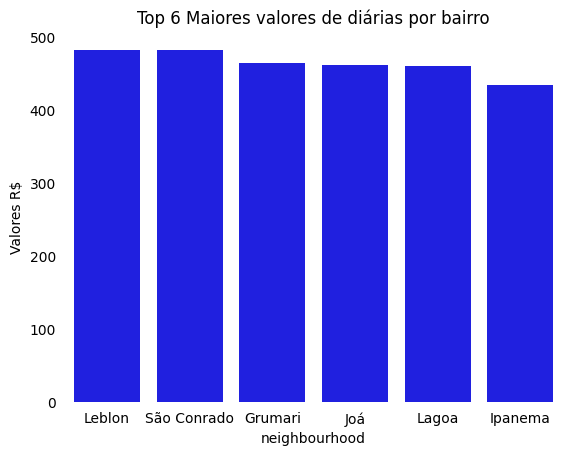

In [26]:
# Gráfico de barra
# Top 6 maiores valores de diárias por bairro

ax = sns.barplot(x=diariaporbairro.index, y=diariaporbairro.values, color='blue')
ax.set_title('Top 6 Maiores valores de diárias por bairro')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('Valores R$', fontsize= 10)
for kew, spine in ax.spines.items():
    spine.set_visible(False)


Com essa análise, concluímos que Leblon, São Conrado e Grumari são os bairros com as diárias mais caras do Rio de Janeiro.

***Tipo de Hospedagem mais alugado.***

In [27]:
# Quantidade de imóveis por tipo de quarto
tipoquarto = new_csv.room_type.value_counts()
print(tipoquarto)
print('\n')


room_type
Entire home/apt    22516
Private room        6367
Shared room          584
Hotel room            24
Name: count, dtype: int64




In [28]:
# Percentual por tipo de quarto
perctipoquarto = new_csv.room_type.value_counts() / new_csv.shape[0]*100
print(perctipoquarto)
print('\n')

room_type
Entire home/apt    76.348717
Private room       21.589638
Shared room         1.980265
Hotel room          0.081381
Name: count, dtype: float64




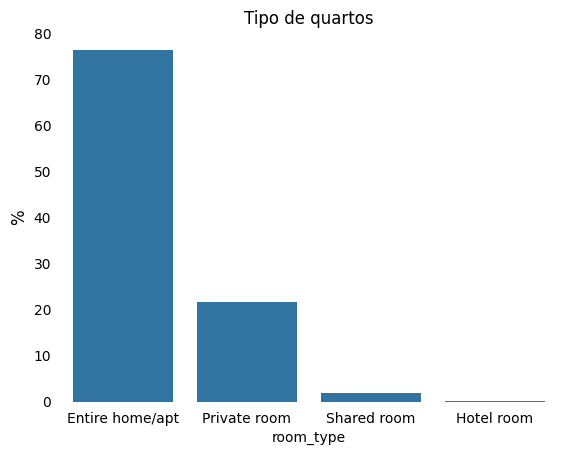

In [29]:
# Gráfico de barra
# Tipo de quarto (%)
ax = sns.barplot(x=tipoquarto.index, y=perctipoquarto)
ax.set_title('Tipo de quartos')
ax.tick_params(bottom=False, top=False, left=False, right=False, color='green');
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Com essa análise concluimos que Entire home/apt é o tipo de acomodação com maior disponibilidade.